In [9]:
#hello hisham
from sage.graphs.graph import Graph

# Creating a graph with vertices and edges
G = Graph()
G.add_vertices([1, 2, 3, 4])
G.add_edges([(1, 2, -1), (2, 3, 1), (3, 4, 1), (4, 1, -1), (1, 3, 1)])
L = G.laplacian_matrix()
L_star = L.delete_rows([0]).delete_columns([0])


print(L)
print(L_star)

det = L_star.det()
print(det)


[ 3 -1 -1 -1]
[-1  2 -1  0]
[-1 -1  3 -1]
[-1  0 -1  2]
[ 2 -1  0]
[-1  3 -1]
[ 0 -1  2]
8


In [10]:
def laplacian(G, i, j):
    L = G.laplacian_matrix()
    L_star = L.delete_rows([i]).delete_columns([j])
    det = L_star.det()
    return L, L_star, det

In [16]:
G = Graph()
G.add_vertices([1, 2, 3, 4])
G.add_edges([(1, 2, -1), (2, 3, 1), (3, 4, 1), (4, 1, -1), (1, 3, 1)])

for i in range(0, 3):
    for j in range(0, 3):
        results = laplacian(G, i, j)
        print(f"i = {i+1}, j = {j+1}, det: {results[2]}")

i = 1, j = 1, det: 8
i = 1, j = 2, det: -8
i = 1, j = 3, det: 8
i = 2, j = 1, det: -8
i = 2, j = 2, det: 8
i = 2, j = 3, det: -8
i = 3, j = 1, det: 8
i = 3, j = 2, det: -8
i = 3, j = 3, det: 8


In [6]:

K_51 = Knots().from_table(5, 1)
K_52 = Knots().from_table(5, 2)
K_61 = Knots().from_table(6, 1)
K_62 = Knots().from_table(6, 2)
K_63 = Knots().from_table(6, 3)
K_71 = Knots().from_table(7, 1)
K_72 = Knots().from_table(7, 2)
K_73 = Knots().from_table(7, 3)
K_74 = Knots().from_table(7, 4)
K_75 = Knots().from_table(7, 5)
K_76 = Knots().from_table(7, 6)
K_77 = Knots().from_table(7, 7)

K_51a = K_51.alexander_polynomial()
print(K_51a)




t^-2 - t^-1 + 1 - t + t^2


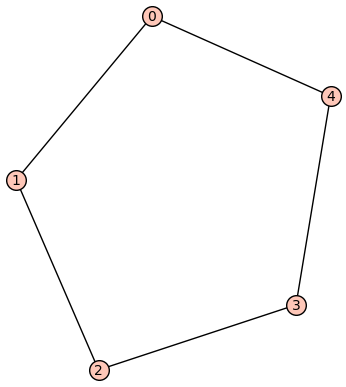

(
[ 2 -1  0  0 -1]                  
[-1  2 -1  0  0]  [ 2 -1  0  0]   
[ 0 -1  2 -1  0]  [-1  2 -1  0]   
[ 0  0 -1  2 -1]  [ 0 -1  2 -1]   
[-1  0  0 -1  2], [ 0  0 -1  2], 5
)

In [29]:
G_51 = Graph()
G_51.add_vertices([0, 1, 2, 3, 4])
G_51.add_edges([(0, 1, 1), (1, 2, 1), (2, 3, 1), (3, 4, 1), (0, 4, 1)])

plot = G_51.plot()

plot.show()

laplacian(G_51, 0, 0)

In [21]:

pd = K_51.projection()

AttributeError: 'Knots_with_category.element_class' object has no attribute 'projection'

In [40]:
W = Knots()
K = Knots('5_1')
pd = planar_diagram(K_51)

NameError: name 'planar_diagram' is not defined

In [1]:
K = Link('5_1')

ValueError: invalid input: data must be either a list or a braid